# Сегментация пользователей банка по потреблению

Для проекта предоставлены данные о клиентах банка «Метанпром»,  располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.


## Цель проекта:
- **Провести анализ клиентов банка и на основе их активности выявить характерные сегменты;**
- **Оценить взаимосвязь между уровнем дохода клиента и количеством используемых продуктов.**


## Задачи проекта:
1. Выполнить исследовательский анализ данных
2. Провести сегментацию пользователей, основываясь на характерных признаках и количестве потребляемых продуктов;
3. Сформулировать и проверить статистические гипотезы.

## План проекта

1. **Общая информация о данных**:
    - Загрузить файл с данными `bank_dataset.csv`;
    - Вывести общую информацию о данных и оценить их качество для дальнейшего анализа;
    - Описание данных:
    ```
        userid — идентификатор пользователя,
        score — баллы кредитного скоринга,
        City — город,
        Gender — пол,
        Age — возраст,
        Objects — количество объектов в собственности,
        Balance — баланс на счёте,
        Products — количество продуктов, которыми пользуется клиент,
        CreditCard — есть ли кредитная карта,
        Loyalty — активный клиент,
        estimated_salary — заработная плата клиента,
        Churn — ушёл или нет. 
     ```
     
2. **Предобработка данных**:
    - Проверить датасет на присутствие дубликатов;
    - Оценить наличие пропусков; в необходимых случаях заполнить их недостающими данными (средними значениями, медианными, заполнить нулями), иначе - обосновать их;
    - Переименовать столбцы в удобный формат.
    
    
3. **Исследовательский анализ данных**:
    - Проверить данные на аномалии: изучить средние и медианные значения признаков. При наличии выбросов оценить их долю относительно общей массы и отфильтровать данные;
    - Построить гистограммы распределения признаков; есть ли какие-то закономерности или взаимосвязи между переменными?
    - Проверить признаки на мультиколлинеарность: построить тепловую карту матрицы корреляции признаков;
    - Оценить качество признаков, категориальные переменные перевести в числовой тип;
    - Провести стандартизацию признаков перед обучением. 
    
    
4. **Сегментирование пользователей банка: задача кластеризации**:
    - Перед построением модели ML стоит определиться с важными факторами:
    
        1. *Присутствуют ли в данных временные ряды;*
        
        2. *Какие модели машинного обучения подойдут лучше всего для выбранной задачи;*
    
        3. *Какие метрики будут использоваться для анализа качества обученных моделей.*
        
    - Построить матрицу расстояний на стандартизированной матрице признаков;
    - Нарисовать дендрограмму: по полученному результату спрогнозировать количество кластеров клиентов;
    - Обучить модель кластеризации пользователей и вывести средние показатели признаков каждого кластера;
    - Составить примерный портрет клиента из каждого кластера: есть ли закономерности между количеством потребляемых продуктов и остальными характеристиками;
    - Для каждого кластера построить графики распределения признаков.
    
    
5. **Анализ статистической гипотезы**:
    - Гипотеза: существует разница в доходах между клиентами, которые пользуются двумя продуктами или одним. Сформулировать нулевую и альтернативную гипотезы;
    - Для анализа разделить датасет на две группы по исследуемому признаку (один-два продукта), посмотреть размер выборок;
    - Для каждой из выделенных групп проверить распреределение данных дохода, изучить наличие аномалий и при необходимости отфильтровать данные;
    - Провести тест и оценить его статистическую значимость.
    
    
6. **Выводы и рекомендации**:
    - На основе полученных результатов сформулировать выводы и краткие рекомендации к руководству банка.

## Подготовка данных

In [1]:
# импорт библиотек
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.model_selection import train_test_split
from scipy import stats as st

In [2]:
data = pd.read_csv('datasets\\bank_dataset.csv') # файл с информацией о клиентах
data.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Итак, для анализа нам предоставлено 10000 записей о пользователях, в данных указаны их пол, возраст и город, уровень заработной платы, в качестве характеристик как клиентов банка у нас есть баллы кредитного скоринга (полагаю, чем больше, тем лучше), баланс счета, количество используемых продуктов, наличие кредитной карты, лояльность и факт оттока (да/нет). 

В предобработке стоит сконцентрироваться на пропусках, наблюдаемых в балансе счета, посмотреть распределение характеристик, выправить названия столбцов, а еще у нас есть два категориальных столбца (город и пол), стоит их перевести в удобный числовой формат, это пригодится при составлении модели ML.

## Предобработка данных

In [4]:
data.columns = [x.lower() for x in data.columns] # переименовываем столбцы

data.rename(
    columns={'userid': 'user_id',
             'creditcard': 'credit_card'},
    inplace=True
)

In [5]:
data['city'].value_counts() # смотрим, нет ли здесь новых городов или пропусков

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

In [6]:
data['gender'].value_counts() # и нет ли лишних значений в столбце "пол"

М    5457
Ж    4543
Name: gender, dtype: int64

В целом имеет смысл уже сейчас перевести формат М/Ж в числовой бинарный вид.

In [7]:
# создаем числовой формат переменной
data['gender'] = data['gender'].replace({'М': 1, 'Ж': 0}) 

Перейдем к изменениям категориальной переменной, в нашем случае это город. Все наши признаки представлены в числовом формате кроме города проживания. Можно разбить город на несколько бинарных полей, однако это не должно быть критично при решении задачи сегментации клиентов, поэтому просто закодируем их в числовой вид.

In [8]:
encoder = LabelEncoder()
data['city_label'] = encoder.fit_transform(data['city']) # шифруем города, понадобится для кластеризации

In [9]:
data.duplicated().sum() # проверка на дубликаты

0

In [10]:
data.isna().sum() # проверка пропусков

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
city_label             0
dtype: int64

Самый главный вопрос предобработки - обработка пропусков в столбце баланса карты, а их у нас более 36%. Первая версия - сбои с загрузке базы данных. Вторая - возможно, эти пользователи пользуются только кредитной картой, и система считывает их счет как дебетовый и, следовательно, как нулевой. Посмотрим, много ли пользователей с пропущенным балансом имеют кредитные карты.

In [11]:
data[data['balance'].isna() == True].groupby('credit_card')['user_id'].count()

credit_card
0    1025
1    2592
Name: user_id, dtype: int64

71.6% пользователей с пустым балансом имеют кредитную карту, это довольно много. Сравним еще, как коррелируют между собой баланс счета и зарплата, а так же есть ли различия в балансе между городами.

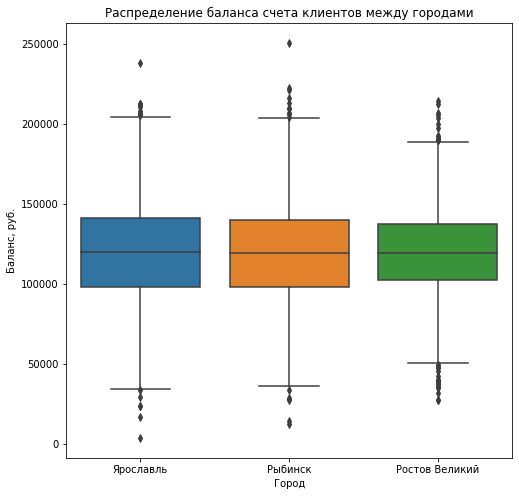

In [12]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['balance'], x=data['city']) #боксплот по балансу на счете
plt.title('Распределение баланса счета клиентов между городами')
plt.xlabel('Город')
plt.ylabel('Баланс, руб.')
plt.show()

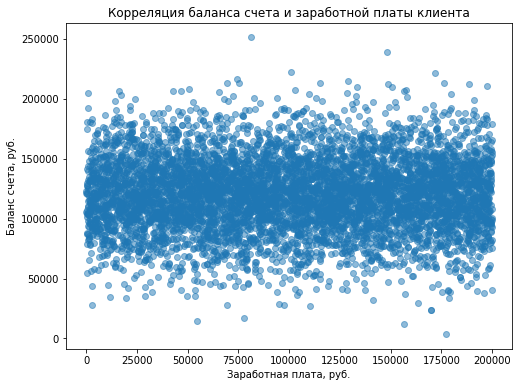

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x=data['estimated_salary'], y=data['balance'], alpha=0.5) # корреляция зарплаты и размера счета
plt.title('Корреляция баланса счета и заработной платы клиента')
plt.xlabel('Заработная плата, руб.')
plt.ylabel('Баланс счета, руб.')
plt.show()

Судя по диаграмме, корреляции между этими величинами не наблюдается.

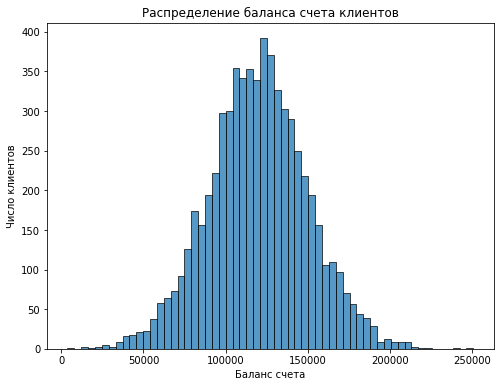

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(x=data['balance'])
plt.title('Распределение баланса счета клиентов')
plt.xlabel('Баланс счета')
plt.ylabel('Число клиентов')
plt.show()

Распределение нормальное, среднее и медианное значения баланса счета примерно равны, к тому же нет корреляции между балансом и зарплатой клиента (и, заглядывая вперед, с остальными характеристиками тоже). 

In [15]:
passes = data[data['balance'].isna() == True] # выделим пропуски для удобства

passes.groupby('city')['user_id'].count() # пропуски по городам

city
Рыбинск      1199
Ярославль    2418
Name: user_id, dtype: int64

Интересно, что пропуски попались только в двух из трех представленных городов.

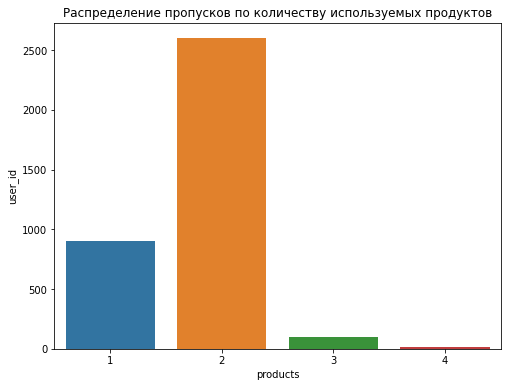

In [16]:
plt.figure(figsize=(8,6))  # группировка по продуктам
sns.barplot(
    x=(
        passes.groupby('products')['user_id'].count()
    ).index,
    y=(
        passes.groupby('products')['user_id'].count()
    )
)
plt.title('Распределение пропусков по количеству используемых продуктов')
plt.show()

In [17]:
print('Распределение пропусков в зависимости от активности клиента')
print(passes.groupby('loyalty')['user_id'].count()) # пропуски по городам

print('\nРаспределение пропусков в зависимости от пола клиента')
print(passes.groupby('gender')['user_id'].count())

Распределение пропусков в зависимости от активности клиента
loyalty
0    1744
1    1873
Name: user_id, dtype: int64

Распределение пропусков в зависимости от пола клиента
gender
0    1654
1    1963
Name: user_id, dtype: int64


In [18]:
print(passes.groupby('products')['user_id'].count())

products
1     905
2    2600
3      98
4      14
Name: user_id, dtype: int64


Итак, ни активность, ни пол клиента не имеют закономерности в появлении пропущенных значений, однако мы выяснили, что такие клиенты находятся только в  Рыбинске и Ярославле, а вот в Ростове Великом таких проблем нет. Так же сильно выделяется группа клиентов с двумя продуктами в использовании, всего таких пользователей так же 71,8% процент от общего числа пропусков.

Есть вероятность, что в двух городах ошибочно подгружаются данные о балансе клиентов с кредитной картой: об этом говорит их географическое распределение, а так же сильная взаимосвязь с наличием кредитки и количеством продуктов. В данной работе мы заполним эти пропуски нулевым значением.

In [19]:
data.fillna(0, inplace=True) # заполняем

data.isna().sum() # и проверяем

user_id             0
score               0
city                0
gender              0
age                 0
objects             0
balance             0
products            0
credit_card         0
loyalty             0
estimated_salary    0
churn               0
city_label          0
dtype: int64

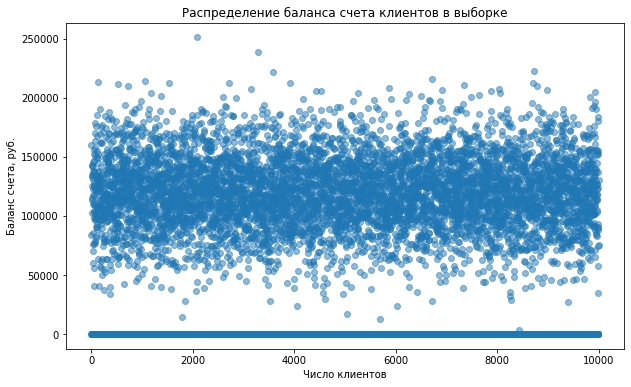

In [20]:
line = pd.Series(range(0, len(data['balance'])))

plt.figure(figsize=(10,6))
plt.scatter(x=line, y=data['balance'], alpha=0.5)
plt.title('Распределение баланса счета клиентов в выборке')
plt.xlabel('Число клиентов')
plt.ylabel('Баланс счета, руб.')
plt.show()

Сейчас видно, что наши нули распределились равномерно по всему датасету.

Что ж, основные проблемы мы исправили, проверили дубликаты, поработали с пропусками, можно идти дальше.

## EDA

Начнем исследовательский анализ с проверки средних и медианных показателей данных.

In [21]:
data.describe() # посмотрим на средние и медианные характеристики

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_label
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,1.250500
std,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.830433
min,1.560844e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,1.567126e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,1.573347e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,2.000000
75%,1.579597e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,2.000000
max,1.585843e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,2.000000


В среднем **в отток уходит около 20% клиентов**. Медианный и средний доход пользователей в районе 100 тысяч рублей, однако обнаружился минимум зарплаты со значением 11 рублей, что от реальных показателей довольно далеко.

У **70% есть кредитная карта**, средний баланс счета после пропусков снизился до 76 тысяч, а еще чаще всего у клиентов есть пять объектов в собственности... Все это сводится к тому, что банк сотрудничает с клиентами среднего класса и выше. 

В возрастной категории аномалий нет, минимальный возраст 18 лет, максимальный 92, а в медиане 37 - **чаще всего клиентами банка становятся люди среднего возраста**.

Кредитный скоринг распределен в диапазоне от 350 до 850 баллов, в среднем, уже 600 баллов достаточно для хорошего рейтинга, и, судя по первому квартилю, 75% клиентов имеют рейтинг выше 580 баллов (кстати, примерно столько же пользователей и пользуется кредитной картой).

In [22]:
np.percentile(data['estimated_salary'], [1,5,10]) # посмотрим перцентили дохода

array([ 1842.8253,  9851.8185, 20273.58  ])

Не более 5% клиентов зарабатывают меньше 9851 рубля, и не более 10% - 20 тысяч рублей. 

Чтобы отфильтровать данные (судя по объему этой аномалии, таких данных не более 10% от датафрейма), нужно ориентироваться на какой-то порог, либо это определенный перцентиль, либо фиксированная сумма. Что касается суммы, то миниальный размер оплаты труда на момент анализа - 15279 рублей, что уже выше 5-го перцентиля. Однако, в наших данных есть разброс клиентов по возрасту до 92 лет, а значит, присутствуют и пенсионеры, а там порог пенсии уже довольно размытый, в законодательстве нет точных цифр, но минимальная социальная пенсия, к примеру, составляет 6295,30 руб. Чтобы не строить расчеты на цифрах, которые могут постоянно меняться и индексироваться, будем ориентироваться на нижнюю границу - 5-ый перцентиль.

In [23]:
limit = np.percentile(data['estimated_salary'], [5])[0] # установим лимит
data_new = data.query('estimated_salary >= @limit').copy() # фильтруем данные 

In [24]:
X = data_new.drop(['user_id', 'city_label'], axis=1) # матрица признаков
X = pd.get_dummies(X) # разбиваем города на бинарные столбцы 

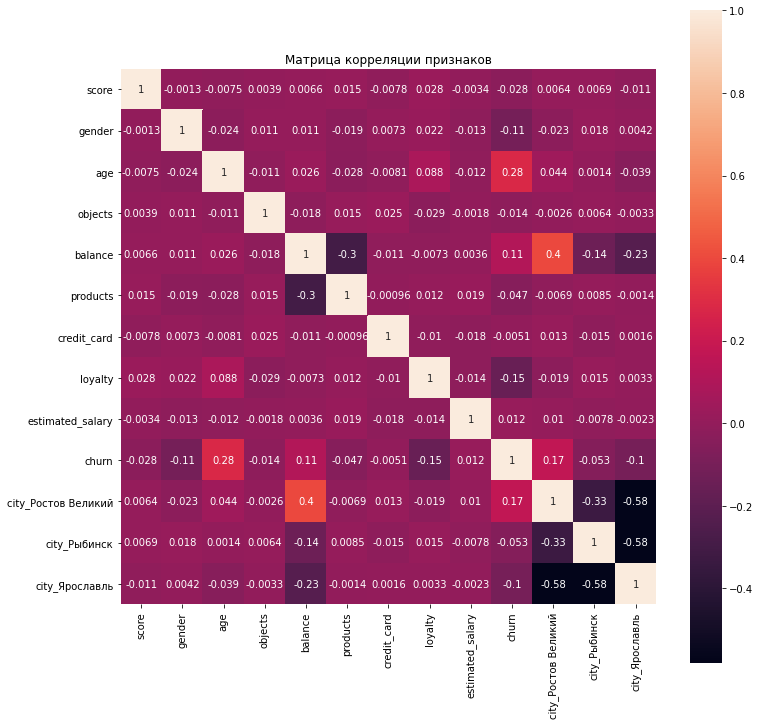

In [25]:
# матрица корреляции
x_corr = X.corr() 

# тепловая карта матрицы корреляции
plt.figure(figsize=(12,12))
sns.heatmap(x_corr, annot=True, square=True) 
plt.title("Матрица корреляции признаков")
plt.show()

Есть **средне-слабая связь возраста и факта оттока**, а также **оттока и места проживания клиента (в нашем случае это Ростов Великий**. После заполнения пропусков стали коррелировать значения баланса и города Ростов Великий (т.к. пропусков там не было). Слабая связь есть так же между оттоком и активностью клиента, а так же его полом. Признаки городов отрицательно коррелируют между собой, но в целом это было ожидаемо.

Наблюдается так же отрицательная средне-слабая связь баланса счета и количества используемых продуктов. Изучим группировку матрицы по продуктам.

In [26]:
X.groupby('products').mean().T # средние показатели признаков в зависимости от количества продуктов

products,1,2,3,4
score,648.922075,652.688562,647.482072,653.122807
gender,0.548987,0.551906,0.458167,0.368421
age,39.670525,37.802940,43.183267,46.052632
objects,4.982017,5.082453,4.992032,5.192982
balance,98581.925581,52543.590335,76039.247331,91346.584035
credit_card,0.707730,0.706477,0.717131,0.684211
loyalty,0.503927,0.532614,0.446215,0.473684
estimated_salary,104293.842635,105644.578852,110151.855139,109889.029298
churn,0.276561,0.076941,0.824701,1.000000
city_Ростов Великий,0.263745,0.228755,0.366534,0.385965


Бинго. По результатам этой выборки **все клиенты, которые пользовались четырьмя продуктами банка, ушли в отток**. Причем стоит отметить, что с одним продуктов доля оттока около трети клиентов, наименьший процент оттока у клиентов с двумя продуктами, а затем он резко увеличивается.

In [27]:
X = X.drop(['city_Ростов Великий', # удаляем лишние столбцы
            'city_Ярославль', 
            'city_Рыбинск'], axis=1)
X['city_label'] = data_new['city_label']

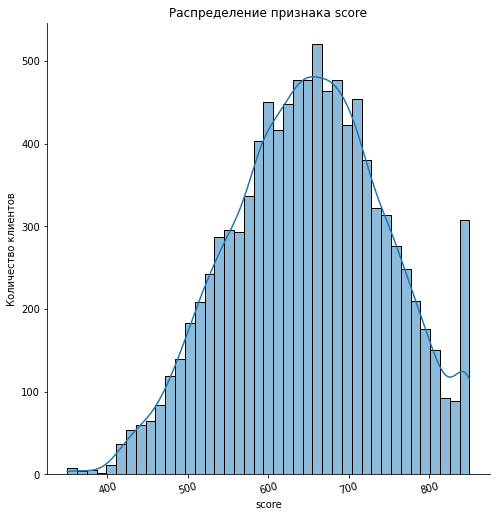

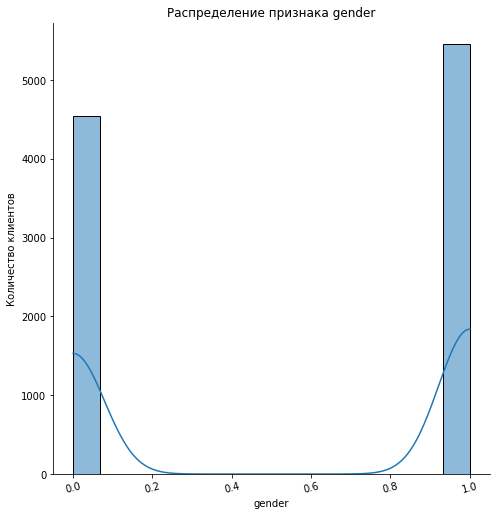

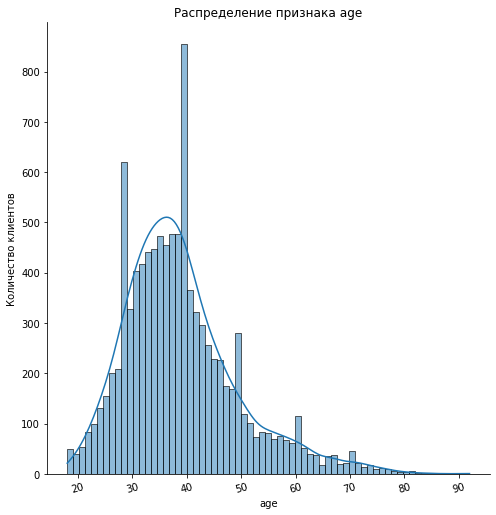

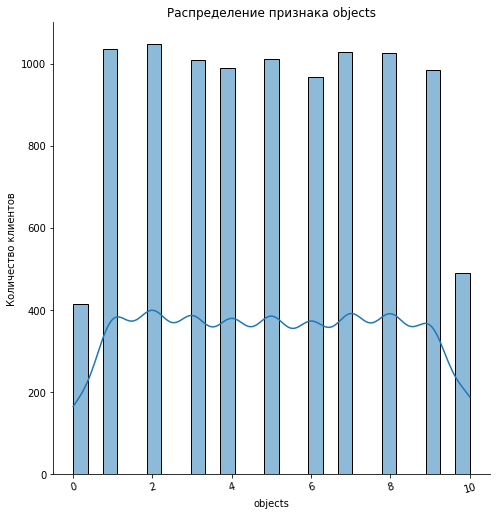

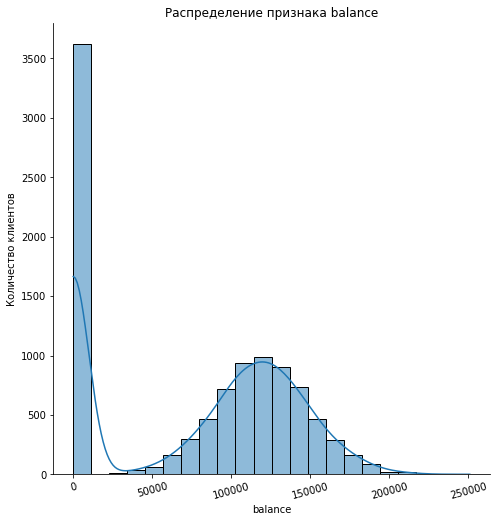

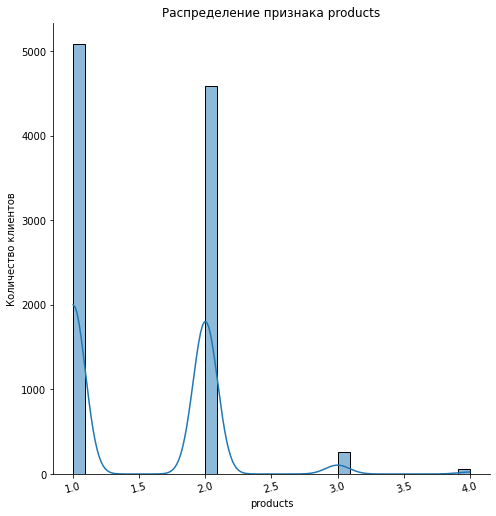

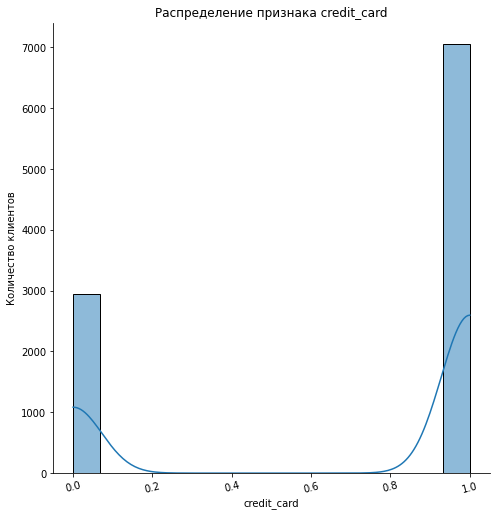

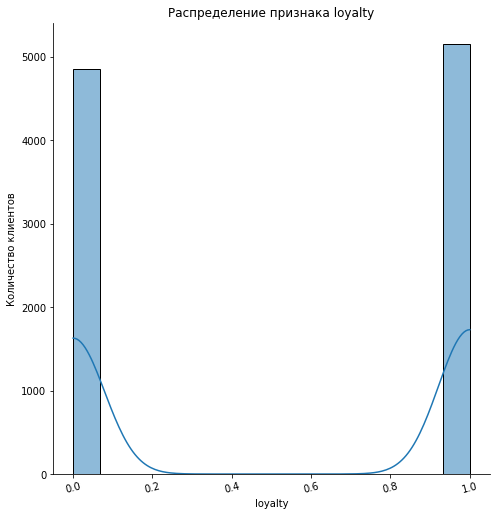

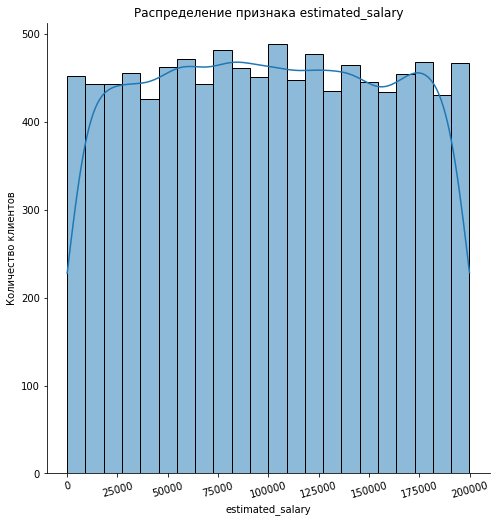

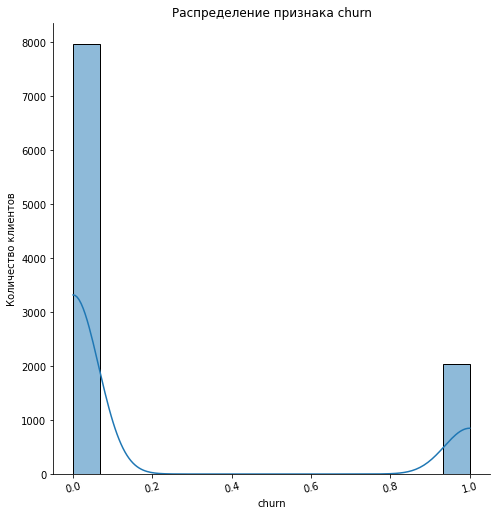

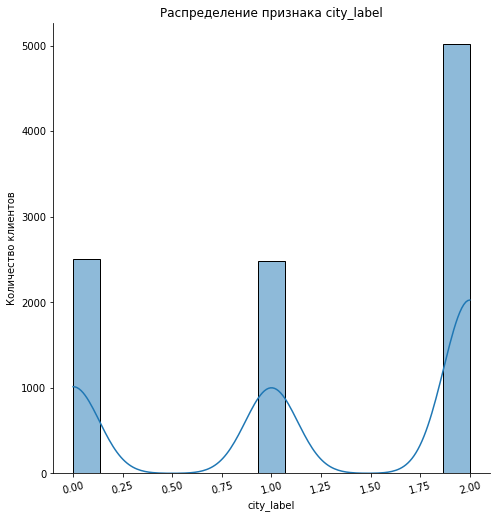

In [28]:
for column in X.columns: # распределение признаков
    sns.displot(data=data, x=column, kde=True, height=7)
    plt.title('Распределение признака ' + column)
    plt.tick_params(axis='y', labelsize = 10)
    plt.tick_params(axis='x', labelsize = 10, labelrotation = 15)
    plt.ylabel('Количество клиентов')
    plt.show()

Помимо того, что мы заметили ранее, стоит сказать, что в выборке есть клиенты с максимальным объемом кредитного скоринга, заработная плата распределена максимально равномерно (прямо "размазана" как масло на бутерброд), у большинства пользователей один или два продукта, количество объектов в собственности такое же равномерное, как и зарплата, а на графике возраста явно выделяются столбики на каждое десятилетие, а больше всего сорокалетних клиентов.

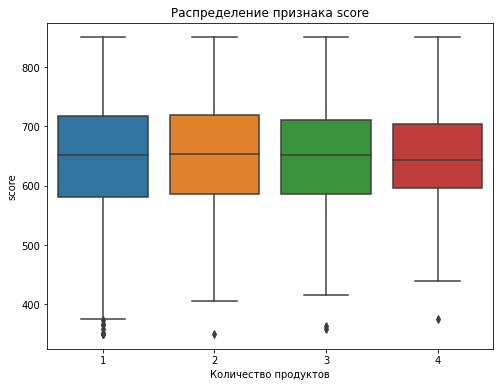

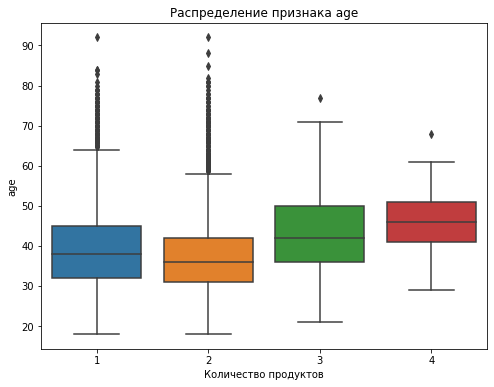

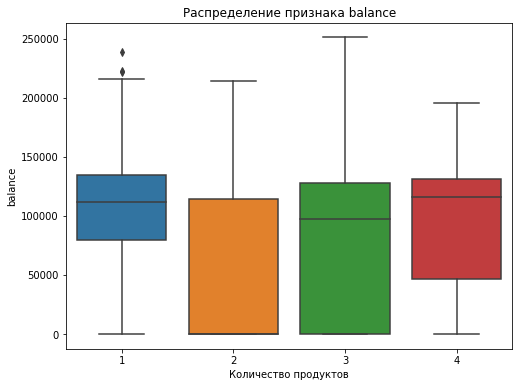

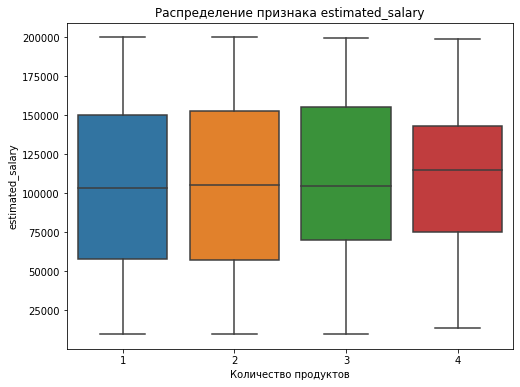

In [29]:
# диаграммы размаха в зависимости от числа используемых продуктов
barplot = ['score', 'age', 'balance', 'estimated_salary'] 

for column in X.columns:
    if column in barplot:
        plt.figure(figsize=(8,6))
        sns.boxplot(x=X['products'], y=X[column])
        plt.title(f'Распределение признака {column}')
        plt.xlabel('Количество продуктов')
        plt.show()

In [30]:
# доля пользователей с нулевым балансом в зависимости от числа продуктов
zero_balance = pd.DataFrame({'all': X.groupby('products')['score'].count(),
                         'zero': X.query('balance == 0').groupby('products')['score'].count()})

zero_balance['ratio'] = (zero_balance['zero'] / zero_balance['all'] * 100).round(2)

zero_balance

,all,zero,ratio
products,,,
1,4838,862,17.82
2,4354,2443,56.11
3,251,92,36.65
4,57,14,24.56


Очевидно, что большая часть пропусков с балансом находилась у клиентов с двумя продуктами в использовании. Хотелось бы знать, какие именно продукты банка подразумеваются, но очевидно, что одним из первых двух является именно кредитная карта.

In [31]:
scaler = StandardScaler() # стандартизация признаков
X_st = scaler.fit_transform(X)

Итак, в этом блоке мы подробнее разобрали распределения признаков и их корреляционные связи, а так же наметили несколько интересных закономерностей, например, чем больше продуктов использует клиент, тем выше вероятность его оттока. Так же мы преобразовали категориальные переменные и провели стандартизацию признаков.

## Кластеризация пользователей

Прежде чем обучать модель и делать прогнозы, стоит определиться с базовыми условиями.

* В случае сегментирования пользователей мы имеем дело с классической задачей кластеризации. В качестве модели машинного обучения будем использовать агломеративную иерархическую кластеризацию: построим дендрограмму и определимся с количеством кластеров, а затем будем использовать метод K-means. 
* Перед расчетами данные необходимо стандартизировать (этот пункт мы сделали заранее).
* В качестве метрики для оценки модели рассчитаем метрику силуэта.

In [32]:
X_train, X_test = train_test_split(X, test_size=0.8, random_state=0) # делаем обучающую выборку
X_train_st = scaler.fit_transform(X_train) 

Строить дендрограмму на всех данных выходит ресурсозатратно, поэтому здесь предполагается выделить 20% данных на построение дендрограммы, чтобы оценить примерное число кластеров, а затем использовать это значение для метода K-means.

In [33]:
linked = linkage(X_train_st, method = 'ward') # матрица расстояний

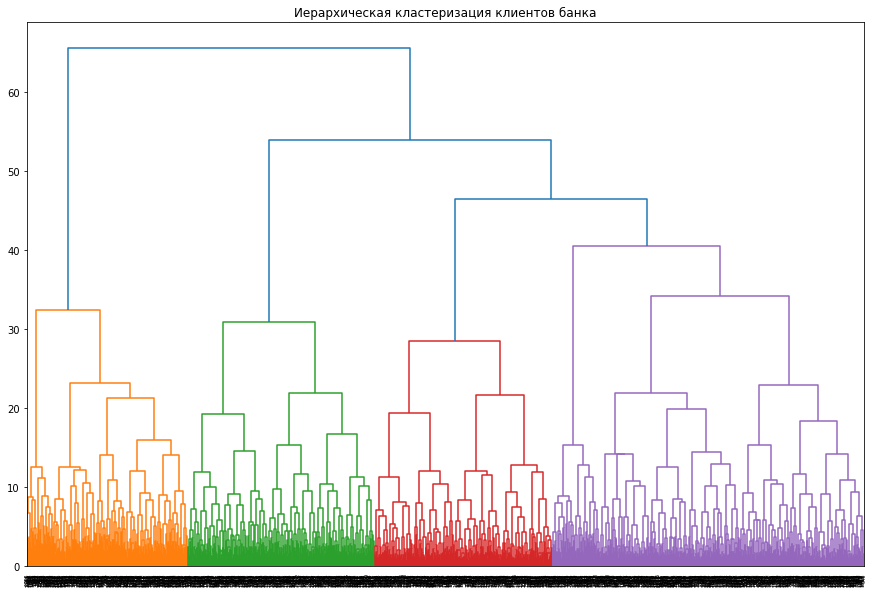

In [34]:
plt.figure(figsize=(15, 10))   # дендрограмма
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов банка')
plt.show() 

Дендрограмма предлагает нам четыре кластера.

In [35]:
# строим модель на 4 кластера
km = KMeans(n_clusters=4, random_state=0)

labels = km.fit_predict(X_st)

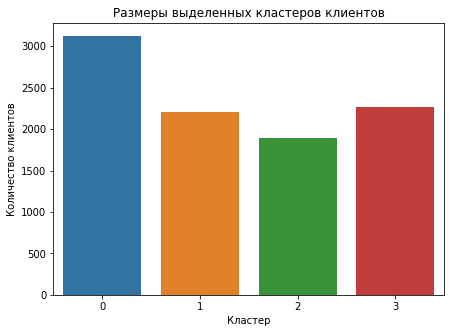

In [36]:
# добавляем метки кластера в датасет

X['cluster'] = labels

# размеры полученных кластеров
plt.figure(figsize=(7,5))
a = X.groupby('cluster')['score'].count()
sns.barplot(x=a.index, y=a)
plt.title('Размеры выделенных кластеров клиентов')
plt.xlabel('Кластер')
plt.ylabel('Количество клиентов')
plt.show()

In [37]:
X.groupby('cluster').mean().round(4).T  #средние показатели каждого кластера

cluster,0,1,2,3
score,652.6205,652.6849,645.1241,650.5018
gender,0.5869,0.5683,0.4400,0.5599
age,37.3450,37.4602,44.9514,37.5885
objects,5.0422,4.9159,4.9482,5.1907
balance,121701.6215,74283.1770,92805.9298,4270.1210
products,1.3414,1.5429,1.4406,1.8480
credit_card,1.0000,0.0000,0.7015,0.9982
loyalty,0.5635,0.5533,0.3539,0.5467
estimated_salary,104385.9270,105802.5856,106327.7719,104379.7726
churn,0.0000,0.0032,1.0000,0.0163


In [38]:
X['city'] = encoder.inverse_transform(X['city_label']) # раскодируем города в новый столбец

Очевидно, что кластеризация произошла на основе нескольких ключевых характеристик: **факт оттока, наличие кредитной карты, возраст, пол клиента  и его баланс счета.**

Составим сводную таблицу основных различающихся характеристик кластеров.

Кластер  | Пол | Возраст | Баланс | Продукты | Кредитная карта | Лояльность | Факт оттока  |
---------| ----|---------|--------| ---------|-----------------| -----------|-------------|
0 | Больше мужчин | До 40 | Больше 100 т.р.| 1-2| Да |0.5 | Нет|
1 | Больше мужчин | До 40 | Около 75 т.р.|1-2| Нет | 0.5| Нет|
2 | Больше женщин | Выше 40 | Около 92 т.р.|1-2| Да | Менее 0.5| Да|
3 | Больше мужчин | До 40 | Около 4 т.р.| 2| Да | 0.5| Нет|

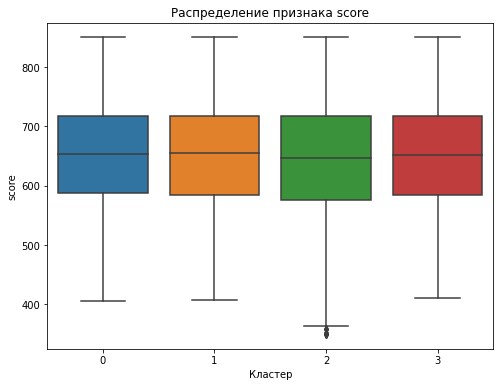

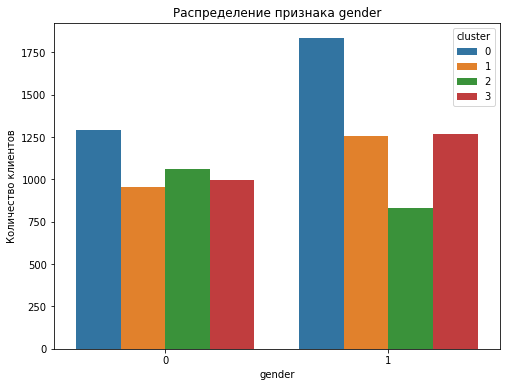

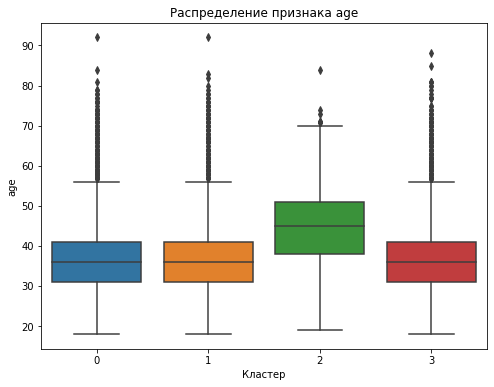

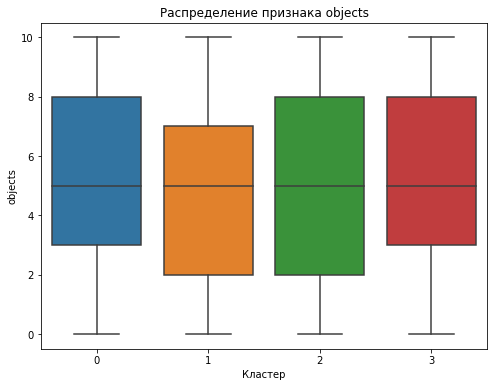

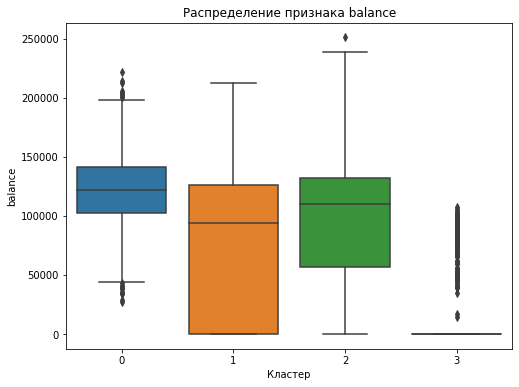

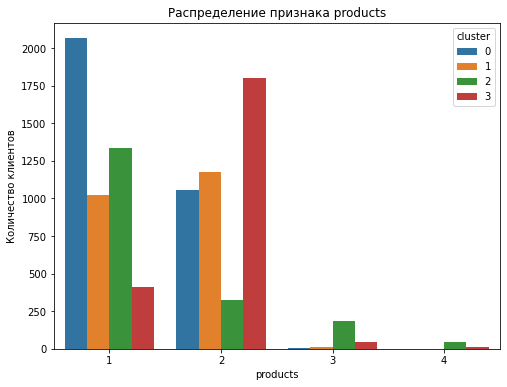

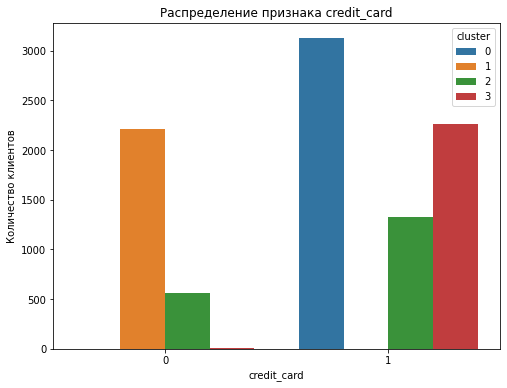

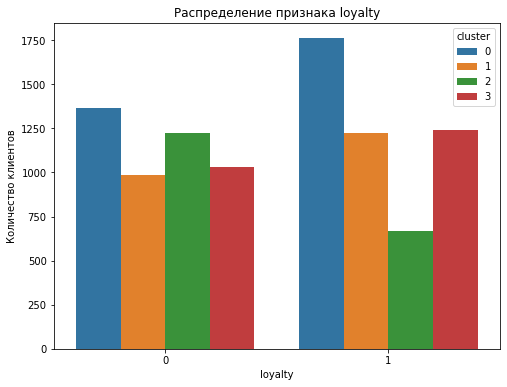

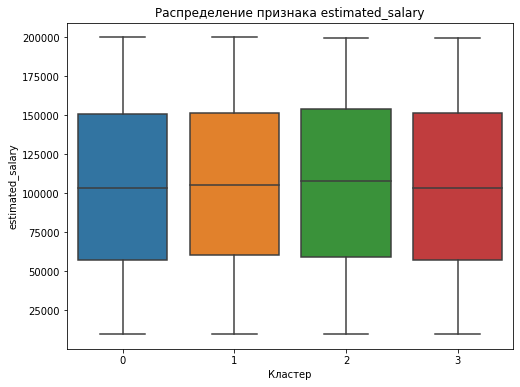

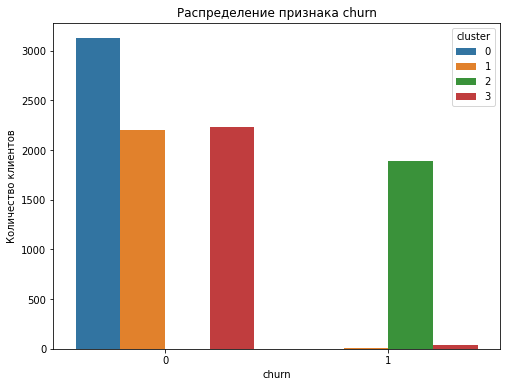

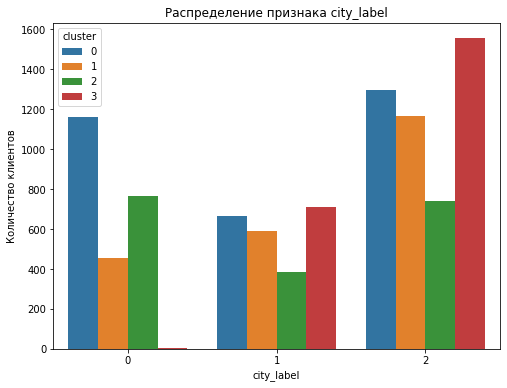

In [39]:
boxplot = ['age',
           'score',
           'balance',
           'objects',
           'estimated_salary']

for column in X.drop(['cluster', 'city'], axis=1).columns: # распределение признаков по группам
    if column in boxplot:
        plt.figure(figsize=(8,6))
        sns.boxplot(x=X['cluster'], y=X[column])
        plt.xlabel('Кластер')
        plt.title(f'Распределение признака {column}')
        plt.show()
    else:
        plt.figure(figsize=(8,6))
        sns.countplot(data=X, x=column, hue='cluster')
        plt.title(f'Распределение признака {column}')
        plt.ylabel('Количество клиентов')
        plt.show()

Итак, **во втором кластере собрались все клиенты, ушедшие в отток**, и мы видим, что их возраст в среднем выше, чем у остальных групп, преобладает доля женщин, а показатель лояльности у них снижен. В противовес ему у самого лояльного кластера (нулевого) у всех клиентов есть кредитная карта, в нем больше мужчин, а продуктов в использовании меньше, 1-2. 

Ранее мы уже отмечали, что чем больше продуктов у клиента, тем скорее он уйдет в отток, выходит, что их оптимальное количество не более двух. 

Доход  на отток не влияeт и между группами практически не различаeтся, на диаграмме размаха есть разброс в балансе клиентов в разных кластерах, но это отчасти вызвано нашим заполнением пропущенных значений. Большая часть клиентов с нулевым балансом распределилась в третий кластер.

В единственном кластере со 100%-ным оттоком есть показатели скоринга ниже 400.

In [40]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_st, labels))) # метрика силуэта

Silhouette_score: 0.11


Значение метрики оказалось не очень высоким, все же границы наших кластеров довольно размыты судя по полученным признакам.

Итак, наша обученная модель разделила клиентов на четыре группы, из всех признаков у некоторых значения равны между кластерами, а некоторые радикально отличаются, благодаря сегментированию мы видим, какими характеристиками обладают активные клиенты, лояльные к банку, и как от них отличаются клиенты, уходящие в отток. Подробные выводы и рекомендации будут представлены ниже.

## Статистический анализ данных

Есть ли разница в доходах между клиентами с одним продуктом банка и с двумя? Чтобы проверить это предположение, сформулируем нулевую и альтернативную гипотезы:

* **H₀ - Между группами клиентов с разным числом продуктов нет разницы в уровне доходов.**
* **H₁ -  В уровне доходов групп клиентов с разным числом продуктов есть статистическая разница.**

В нашем случае будет две группы клиентов: в первой клиенты с одним продуктом, во второй - с двумя продуктами. Разделим датасет на требуемые части.

In [41]:
one = data_new.query('products == 1')['estimated_salary']
two = data_new.query('products == 2')['estimated_salary']

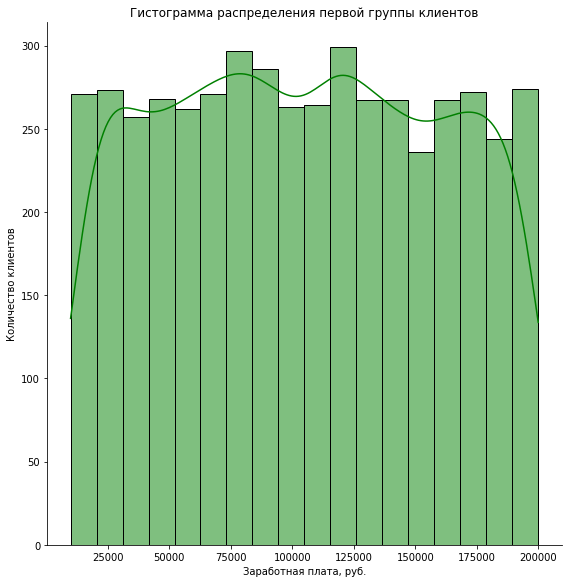

In [42]:
sns_plot = sns.displot(x=one, kde=True, height=8, color='green') # гистограмма распределения первой группы
plt.ylabel('Количество клиентов')
plt.xlabel('Заработная плата, руб.')
plt.title('Гистограмма распределения первой группы клиентов')
plt.show()

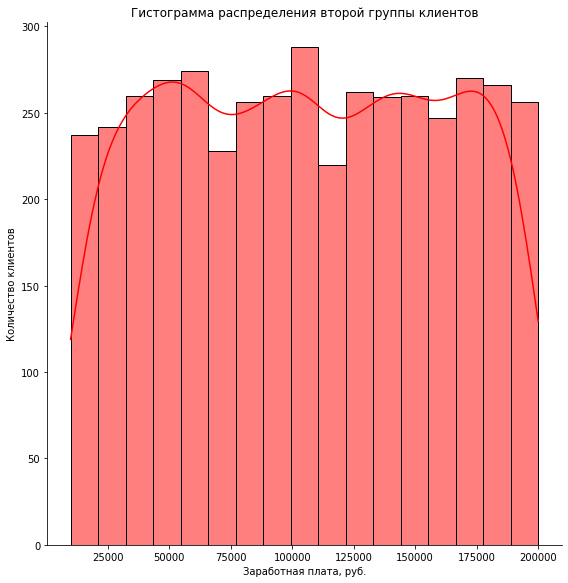

In [43]:
sns_plot = sns.displot(x=two, kde=True, height=8, color='red') # то же для второй группы
plt.ylabel('Количество клиентов')
plt.xlabel('Заработная плата, руб.')
plt.title('Гистограмма распределения второй группы клиентов')
plt.show()

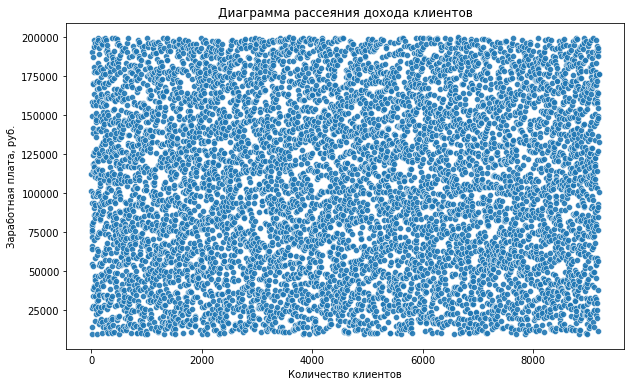

In [44]:
# выбросы в доходах клиента с одним и двумя продуктами
salary_line = pd.Series(range(0, len(data_new.query('products < 3')['estimated_salary'])))

plt.figure(figsize=(10,6))
sns.scatterplot(x=salary_line, y=data_new.query('products < 3')['estimated_salary'], alpha=0.9)
plt.xlabel('Количество клиентов')
plt.ylabel('Заработная плата, руб.')
plt.title('Диаграмма рассеяния дохода клиентов')
plt.show()

In [45]:
print(f'Количество клиентов с одним продуктом: {one.count()}')
print(f'Количество клиентов с двумя продуктами: {two.count()}')

Количество клиентов с одним продуктом: 4838
Количество клиентов с двумя продуктами: 4354


У обеих групп распределение равномерное, выбросов нет. По размерам выборки примерно соответствуют друг другу, тем более что таких клиентов в общей группе подавляющее большинство.

In [46]:
alpha = 0.05 
# проверка выборок на нормальность распределения

p_value = st.shapiro(one)[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  1.5788507732163106e-35
Отвергаем нулевую гипотезу: распределение не нормально


In [47]:
p_value = st.shapiro(two)[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  1.0886550500384016e-34
Отвергаем нулевую гипотезу: распределение не нормально


Данные не подходят для проведения стандартного статистического теста т.к. распределение не нормально, будем использовать непараметрический тест.

In [48]:
alpha = .05 # критерий значимости 5%
results = st.mannwhitneyu(one, two)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print()
print(f'Средний доход клиентов с одним продуктом: {one.mean()}')
print(f'Средний доход клиентов с двумя продуктами: {two.mean()}')

p-значение:  0.2359431259271152
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Средний доход клиентов с одним продуктом: 104293.84263538652
Средний доход клиентов с двумя продуктами: 105644.5788516307


По результатам теста выходит, что между двумя выборками нет статистически значимой разницы, следовательно, между двумя группами доходы клиентов примерно равны.

## Выводы

Итак, основной целью проекта было провести сегментацию пользователей банка, а так же проверить взаимосвязь дохода клиента и количества используемых продуктов. Пойдем по порядку:

1. При предобработке данных был выявлен большой сегмент пропущенных значений баланса клиентов. В ходе сравнений различных срезов данных было выявлено, что большая часть пропусков сконцентрирована в Рыбинске и Ярославле, у клиентов с двумя продуктами, а так же у большинства из них имеется кредитная карта. 
* Т.к. велика вероятность некорректной выгрузки данных с кредитным счетом пользователей, требуется изучить этот вопрос с технической стороны характеристики выгружаемых показателей.

2. Исследовательский анализ данных показал, что **в отток уходит 1/5 доля пользователей**. В основном банк работает со средним классом: на это указывает средний возраст клиентов, медианный доход более 100 тысяч рублей, такой же баланс счета, а так же большое число объектов в собственности - в среднем около пяти. Большинство пользуется кредитной картой и имеет высокий балл кредитного скоринга. Большинство клиентов распределено между Ярославлем и Ростовом Великим, меньше всего клиентов из Рыбинска. 
* Для более глубокого изучения клиентского профиля желательно расширить анкету предоставляемых данных - например, указать, какие именно продукты в использовании подразумеваются в данных, как долго клиент пользуется банковскими услугами, какой период активности рассчитывается как "лояльный". Если у клиентов есть дебетовый и кредитный счет, то хотелось бы видеть какой именно из них предоставлен для анализа.

3. Была проведена кластеризация пользователей методом K_means на **четыре кластера**. Наибольший интерес представляют два из них: нулевой как представитель самой лояльной группы клиентов и второй, в котором все клиенты ушли в отток:
    * Типичный лояльный пользователь банка - это чаще мужчина средних лет с высоким уровнем дохода и большим остатком на балансе счета, у него всегда есть кредитная карта, довольно активный клиент,  пользуется в среднем 1-2 продуктами банка.
    * Клиент в оттоке - это чаще женщина, возраст от сорока лет, с высоким уровнем дохода, скорее всего пользуется кредитной картой, малая активность, пользуется двумя продуктами компании и более.
   
* Есть взаимосвязь между количеством используемых продуктов и фактом оттока: чем больше продуктов, тем скорее клиент перестанет пользоваться услугами банка. Между оттоком и активностью клиента есть слабая обратная корреляция; так же клиенты из Ростова Великого уходят чаще. Эти маркеры, а так же описания лояльных и нелояльных клиентов следует использовать для анализа будущего оттока и удержания клиентов через индивидуальные условия и предложения.

4. Был проведен  статистический анализ данных на основании проверки предположения "Есть ли разница в доходах клиентов с одним или двумя используемыми продуктами?". Были получены следующие результаты: при стандартном критерии значимости в 5% показатель p_value = 0.2359, а это значит, что **нет статистически значимой разницы между доходами клиентов, которые пользуются двумя или одним продуктом банка.**
   
   